In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data=pd.read_csv('//home//root1//Downloads//drug200.csv')

In [7]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [15]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [18]:
#data.dropna(axis=0,how='any',inplace=True)

In [19]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


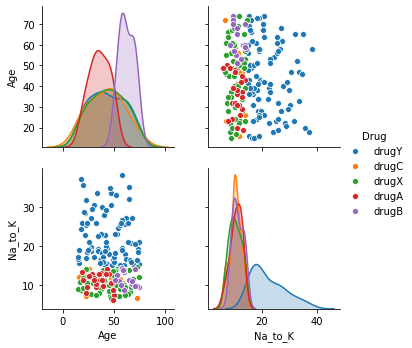

In [24]:
sns.pairplot(data, hue = 'Drug')


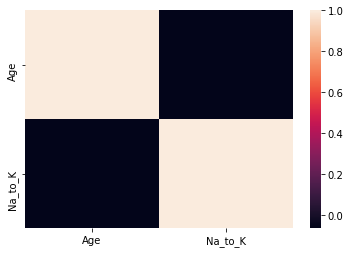

In [26]:
sns.heatmap(data.corr())


In [28]:
target=data['Drug']

In [29]:
target

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [30]:
df=data.copy()

In [31]:
df=df.drop('Drug',axis=1)

In [32]:
X=df

In [33]:
target

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [37]:
le=LabelEncoder()
target=le.fit_transform(target)
target

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [60]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,HIGH,HIGH,25.355
1,47,1,LOW,HIGH,13.093
2,47,1,LOW,HIGH,10.114
3,28,0,NORMAL,HIGH,7.798
4,61,0,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567
196,16,1,LOW,HIGH,12.006
197,52,1,NORMAL,HIGH,9.894
198,23,1,NORMAL,NORMAL,14.020


In [62]:
X['Sex']=le.fit_transform(X['Sex'])
X['BP']=le.fit_transform(X['BP'])
X['Cholesterol']=le.fit_transform(X['Cholesterol'])

In [63]:
y=target

In [47]:
!pip install sklearn

In [64]:
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (160, 5)
Testing split input-  (40, 5)


In [67]:
dtree=DecisionTreeClassifier()

In [68]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
y_pred=dtree.predict(X_test)

In [70]:
y_pred

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [74]:
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 1, 'Accuray Score 1.0')

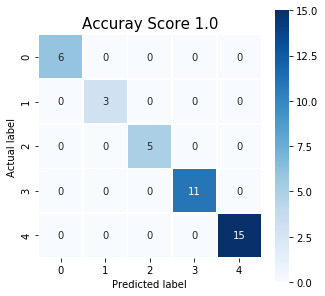

In [76]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuray Score {0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title,size=15)

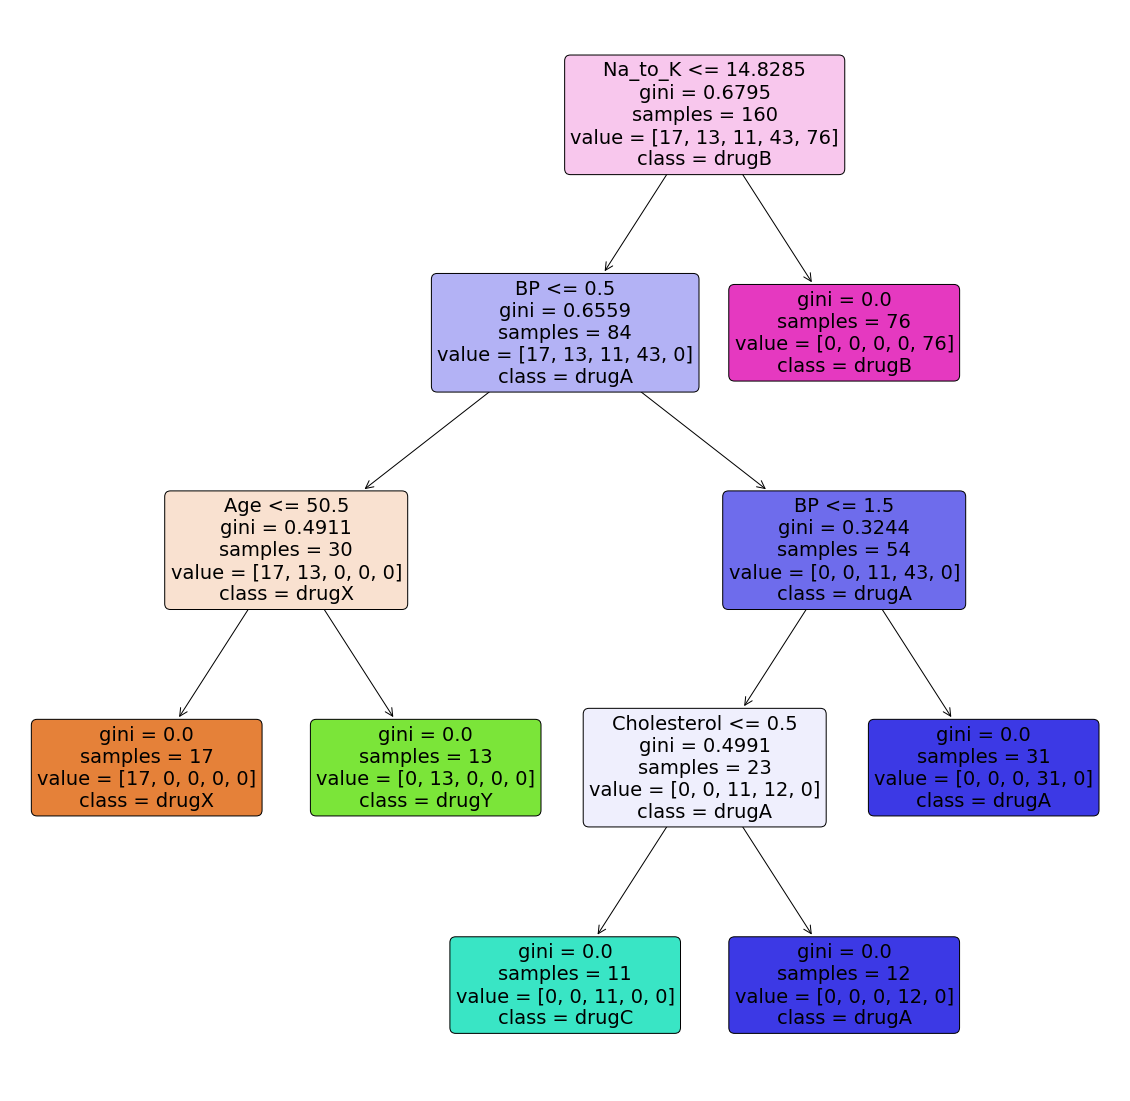

In [78]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["drugX", "drugY", "drugC","drugA","drugB"] , filled = True , precision = 4, rounded = True)